In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [4]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

C:\ananconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(train_data,
                    train_labels,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=1)

test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

print(f"테스트 데이터 MAE: {test_mae_score:.2f}")

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 536.3033 - mae: 21.3478 - val_loss: 505.1808 - val_mae: 20.6688
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 429.6859 - mae: 18.9068 - val_loss: 354.9875 - val_mae: 16.9187
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 240.1422 - mae: 13.6779 - val_loss: 196.1254 - val_mae: 11.6229
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 139.9166 - mae: 9.8106 - val_loss: 105.1030 - val_mae: 7.7769
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 58.6279 - mae: 6.0564 - val_loss: 60.4592 - val_mae: 5.7324
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 45.7403 - mae: 4.6170 - val_loss: 43.5423 - val_mae: 4.7873
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.7187 - mae: 3.9799 - val_loss: 32.4168 - val_mae: 4.1729
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.8172 - mae: 3.7529 - val_loss: 29.3597 - val_mae: 3.8841
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━

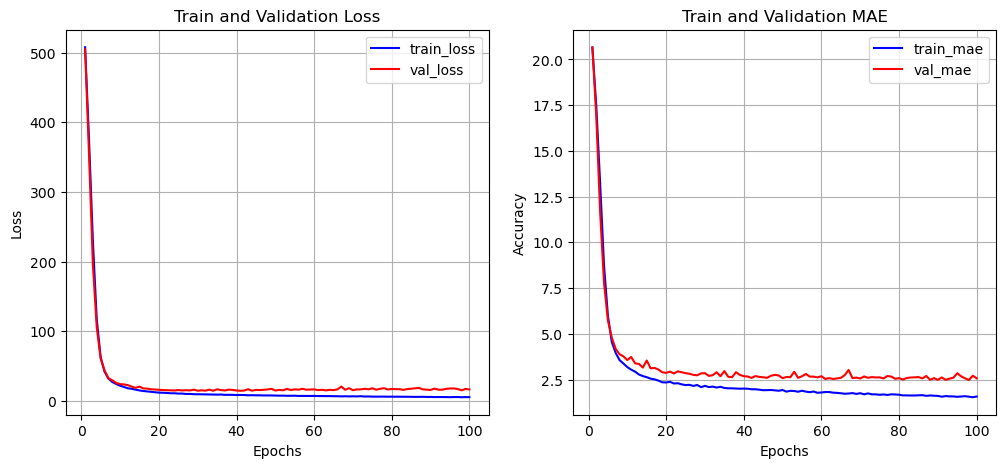

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

print(f"테스트 데이터 MAE: {test_mae_score:.2f}")
print(f"테스트 데이터 MSE: {test_mse_score:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.6073 - mae: 2.9468
테스트 데이터 MAE: 3.11
테스트 데이터 MSE: 23.30


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

validation_split_point = int(len(train_data) * 0.25)

val_data = train_data[:validation_split_point]
val_labels = train_labels[:validation_split_point]

partial_x_train = train_data[validation_split_point:]
partial_y_train = train_labels[validation_split_point:]

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2245
2246
46


In [12]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [14]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │       1,280,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,292,142 (4.93 MB)

 Trainable params: 1,291,758 (4.93 MB)

 Non-trainable params: 384 (1.50 KB)

In [17]:
checkpoint_cb = ModelCheckpoint(
    'best_reuters_model.keras',    
    monitor='val_loss',          
    save_best_only=True,                           
)

early_stopping_cb = EarlyStopping(
    patience=10,                
    monitor='val_loss',
    restore_best_weights=True,  
)

history = model.fit(
    x_train,                    
    y_train,                      
    epochs=60,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.2489 - loss: 3.4742 - val_accuracy: 0.7087 - val_loss: 3.2480
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6386 - loss: 1.7703 - val_accuracy: 0.7653 - val_loss: 2.8338
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7309 - loss: 1.3443 - val_accuracy: 0.7920 - val_loss: 2.4779
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7799 - loss: 1.0762 - val_accuracy: 0.8111 - val_loss: 2.1844
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8030 - loss: 0.9222 - val_accuracy: 0.8361 - val_loss: 1.8934
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8261 - loss: 0.7962 - val_accuracy: 0.8405 - val_loss: 1.6627
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8534 - loss: 0.6906 - val_accuracy: 0.8597 - val_loss: 1.4313
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8515 - loss: 0.6508 - val_accuracy: 0.8588 - v

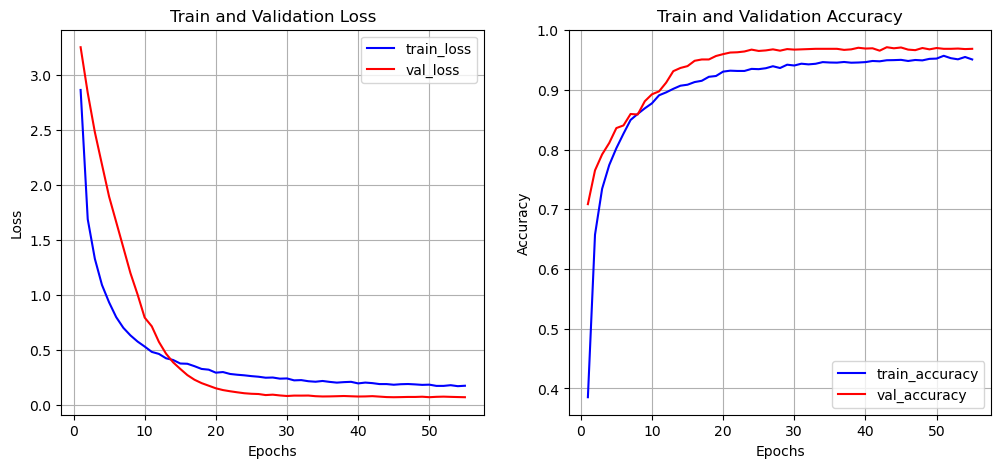

In [18]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [22]:
from keras.models import load_model

best_model = load_model('best_reuters_model.keras')
loss, accuracy = best_model.evaluate(x_test, y_test, verbose=0)

print(f"최종 테스트 손실 (Loss): {loss:.4f}")
print(f"최종 테스트 정확도 (Accuracy): {accuracy:.4f}")

최종 테스트 손실 (Loss): 1.3016
최종 테스트 정확도 (Accuracy): 0.8041


In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [24]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [25]:
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

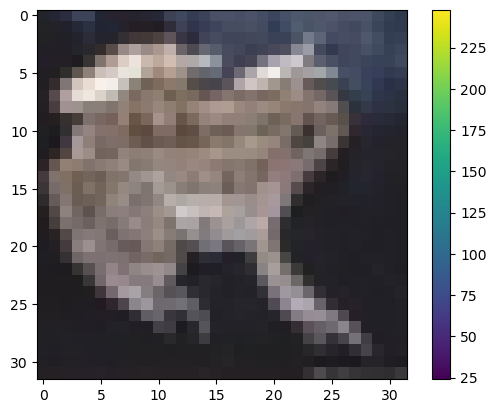

In [27]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [28]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [29]:
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [30]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [32]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [33]:
utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [34]:
checkpoint_cb = ModelCheckpoint(
    'best_cifar10_model.keras',   
    monitor='val_loss',          
    save_best_only=True,         
    verbose=1                    
)

early_stopping_cb = EarlyStopping(
    patience=10,                 
    monitor='val_loss',
    restore_best_weights=True,   
    verbose=1
)

history = model.fit(
    x_train, y_train,
    epochs=60,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2235 - loss: 2.3994
Epoch 1: val_loss improved from inf to 1.83781, saving model to best_cifar10_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.2237 - loss: 2.3987 - val_accuracy: 0.3351 - val_loss: 1.8378
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3303 - loss: 1.8697
Epoch 2: val_loss improved from 1.83781 to 1.77704, saving model to best_cifar10_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3304 - loss: 1.8696 - val_accuracy: 0.3612 - val_loss: 1.7770
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3619 - loss: 1.7577
Epoch 3: val_loss improved from 1.77704 to 1.76728, saving model to best_cifar10_model.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.3619 - loss: 1.7577 - val_accuracy: 0.3736 - val_loss: 1.7673
Epoch 4/60
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3838 - loss: 1.7177
Epoch 4: val_loss impr

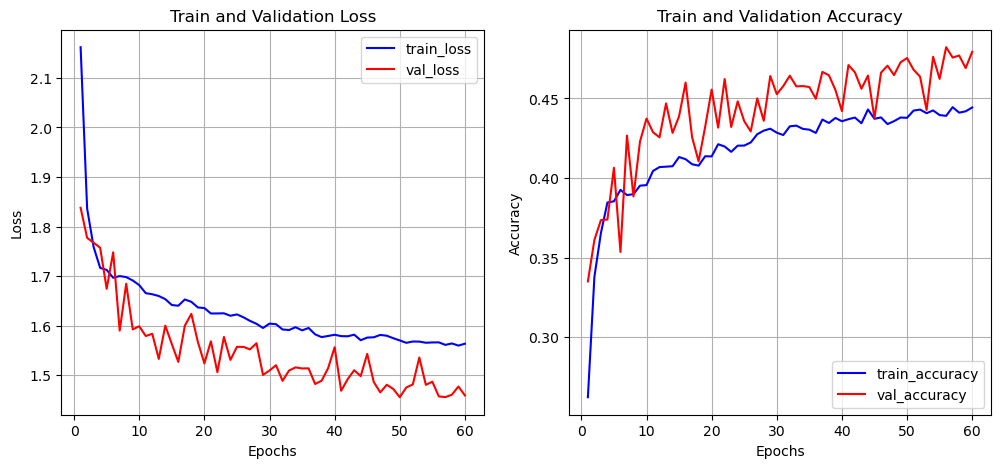

In [35]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [36]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4769 - loss: 1.4459


[1.4514362812042236, 0.4758000075817108]

Accuracy 낮은이유?

image는 4차원 배열이지만 강제로 Dense 를 이용하기 위해 2차원 배열로 바꿨기 때문?